In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
#TODO make separate notebooks for each system

In [2]:
# #uncomment this block for HeH+
sys = 'heh+'
c0hf = 0.9625707
c1hf = -0.2691179
c2hf = 0.0321435
c2b1b0 = 0.1903932
c2b1b1 = 0.6809922 
c2b1b2 = 0.0000088
c2a1a0 = c2b1b0
c2a1a1 = c2b1b1
c2a1a2 = c2b1b2
c22110 = -0.0309597 
c22111 = 0.0086428
c22112 = 0.999483

In [3]:
# #form basis and dictionary of CI coefficients
phi1 = np.array([1,0]).reshape((2,1))
phi2 = np.array([0, 1]).reshape((2,1))
chf = {0: c0hf, 1: c1hf, 2:  c2hf}
c2b1b = {0: c2b1b0, 1: c2b1b1, 2:  c2b1b2}
c2a1a = {0: c2a1a0, 1: c2a1a1, 2:  c2a1a2}
c2211 = {0: c22110, 1: c22111, 2:  c22112}

In [4]:
tens = np.zeros((3,3,2,2))
for i in range(0,3):
    for j in range(0,3):
        tens [i,j,:,:] = 2 * (chf[i]*chf[j] *(phi1 @phi1.T) + (1/2)*c2a1a[i]*c2a1a[j]*(phi1 @phi1.T + phi2 @phi2.T) 
                                           +(1/2) * c2b1b[i]*c2b1b[j]*(phi1 @phi1.T + phi2 @phi2.T) + c2211[i]*c2211[j]*(phi2 @phi2.T)
                                          +(1/2) * (chf[i]*c2a1a[j] * (phi1 @ phi2.T) + c2a1a[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (chf[i]*c2b1b[j] * (phi1 @ phi2.T) + c2b1b[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (c2a1a[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2a1a[j]*(phi2 @ phi1.T))
                                          +(1/2) * (c2b1b[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2b1b[j]*(phi2 @ phi1.T)))
        print('TRACE: ',np.trace(tens [i,j,:,:]),str(i)+str(j))
    
tens
#can compare this MO -> AO with saved Gaussian

TRACE:  1.99999999347012 00
TRACE:  -3.122922009879403e-08 01
TRACE:  9.676133999603209e-08 02
TRACE:  -3.122922009879403e-08 10
TRACE:  1.99999979002786 11
TRACE:  -1.4816705999620705e-07 12
TRACE:  9.676133999603209e-08 20
TRACE:  -1.4816705999620705e-07 21
TRACE:  1.9999989440722603 22


array([[[[ 1.92558385,  0.        ],
         [ 0.        ,  0.07441615]],

        [[-0.25877744,  0.        ],
         [ 0.        ,  0.25877741]],

        [[ 0.06188413,  0.        ],
         [ 0.        , -0.06188404]]],


       [[[-0.25877744,  0.        ],
         [ 0.        ,  0.25877741]],

        [[ 1.07234964,  0.        ],
         [ 0.        ,  0.92765015]],

        [[-0.0172888 ,  0.        ],
         [ 0.        ,  0.01728865]]],


       [[[ 0.06188413,  0.        ],
         [ 0.        , -0.06188404]],

        [[-0.0172888 ,  0.        ],
         [ 0.        ,  0.01728865]],

        [[ 0.00206641,  0.        ],
         [ 0.        ,  1.99793253]]]])

In [172]:
M = np.array([np.array([2,-2+2j])/np.linalg.norm(np.array([2,-2+2j])),
              np.array([2+2j,2])/np.linalg.norm(np.array([2,2+2j]))])

In [176]:
M @ M.conj().T, M.conj().T @ M

(array([[1.00000000e+00+0.j, 2.94613014e-18+0.j],
        [2.94613014e-18+0.j, 1.00000000e+00+0.j]]),
 array([[ 1.00000000e+00+0.j, -2.94613014e-18+0.j],
        [-2.94613014e-18+0.j,  1.00000000e+00+0.j]]))

In [140]:
trajs = []
numsteps = 20000
for i in range(10,100):
    time_coeffs = np.loadtxt('C:/Users/Hardeep/Desktop/test/time_coeffs.tdcasscf_'+sys+'_sto-3g_0'+str(i)+'_dt=0.082680au.txt',dtype=np.cdouble)
    time_coeffs = np.delete(time_coeffs,0,1)
    #print(np.sum(np.square(np.abs(time_coeffs)),axis=1))
    time_coeffs2 = np.delete(time_coeffs,1,1)
    #print(np.sum(np.abs(np.square(time_coeffs2)),axis=1))
    #plt.plot(np.arange(0,time_coeffs2.shape[0]),np.sum(np.abs(np.square(time_coeffs2)),axis=1));
    #plt.show()
    rdmMO = M @ np.einsum('ni,nj,ijab->nab',time_coeffs2, np.conjugate(time_coeffs2), tens) @ M.conj().T
    trajs.append(rdmMO[:numsteps,:,:])
trajs = np.array(trajs)
trajs.shape

(90, 20000, 2, 2)

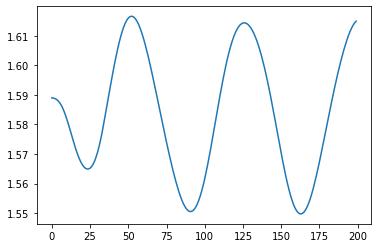

In [166]:
plt.plot(trajs[89,:200,0,0].real)

In [79]:
with open('heh+_training_data_unitary.npz', 'wb') as f:
    np.save(f, trajs)